Question 1)

We have 2 matrices of sizes (n x k) and (k x m). First of all we can perform the multiplication between these matrices as number of columns of 1st matrix and rows of 2nd matrix are same and the final dimensions are (n x m).   

We have to perform (k-1) additions and corresponding (k) multiplications for each element in the final matrix. And we have (n) such rows in 1 column. And we have (m) columns in the final matrix. So we have to do a total of (k-1)x(n)x(m) additions and (k)x(n)x(m) multiplications.

In [2]:
##Question 2): Multiply matrices of dimensions of Q1
#1 list of lists method:

#let n,k,m = 4,3,2

import timeit
code_to_test = """
A,B = [[1,2,3],[3,1,0],[1,8,2],[7,2,4]],[[2,3],[1,2],[8,0]] # 4 x 3, 3 x 2
answer_1 = [[sum(a*b for a,b in zip(A_row,B_col))for B_col in zip(*B)] for A_row in A]
print("Using list of lists method:",answer_1)
"""
A,B = [[1,2,3],[3,1,0],[1,8,2],[7,2,4]],[[2,3],[1,2],[8,0]] # 4 x 3, 3 x 2

answer_1 = [[sum(a*b for a,b in zip(A_row,B_col))for B_col in zip(*B)] for A_row in A] #zip(*B) is transpose of B.
#For every element of column of B, we multiply every element of row of A.Then we do the sum of them and we get no.of rows of A x no.of cols of B as Output dims.
execution_time = timeit.timeit(code_to_test, number=1)
print("time to execute:",execution_time,"seconds")

Using list of lists method: [[28, 7], [7, 11], [26, 19], [48, 25]]
time to execute: 0.00042170000006080954 seconds


In [3]:
#2 numpy method
import numpy as np

import timeit
code_to_test = """
A = np.array([[1, 2, 3], [3, 1, 0], [1, 8, 2], [7, 2, 4]])
B = np.array([[2, 3], [1, 2], [8, 0]])
answer_2 = np.dot(A, B)
print("Using numpy method:",answer_2)
"""
execution_time = timeit.timeit(code_to_test, number=1, globals=globals())
print("Time to execute:", execution_time, "seconds")

Using numpy method: [[28  7]
 [ 7 11]
 [26 19]
 [48 25]]
Time to execute: 0.002703900000142312 seconds


Numpy method is faster than List of lists method as in numpy method, the numbers are stored in contiguous memory locations, not in random like lists. And, The NumPy package integrates C, C++, Fortran codes in Python. These programming languages have very little execution time compared to pure Python and numpy avoids multiple loops unlike list of lists method.

[GeeksforGeeks. (2021, August 13). Why is Numpy faster in Python? GeeksforGeeks. https://www.geeksforgeeks.org/why-numpy-is-faster-in-python/] 

In [4]:
#Question 3)
#let
A = [1, 4, 7, 4, 2, 0, 19, 8, 5]

#1) finding the median for A using method, which needs 1 iteration to get maximum element.
import timeit

code_to_test = """
A_copy = A.copy()
length = len(A_copy)
n = len(A_copy) // 2 + 1

for _ in range(n):
    max_idx = 0
    for i in range(1, len(A_copy)):
        if A_copy[i] > A_copy[max_idx]:
            max_idx = i
    max_value_1 = A_copy.pop(max_idx)

if length % 2 == 0:

    max_idx = 0
    for i in range(1, len(A_copy)):
        if A_copy[i] > A_copy[max_idx]:
            max_idx = i
    max_value_2 = A_copy.pop(max_idx)
    median = (max_value_1 + max_value_2) / 2
else:
    median = max_value_1

print("Using this approach, median:", median)
"""

execution_time = timeit.timeit(code_to_test, number=1, globals=globals())
print("Time to execute:", execution_time, "seconds")


Using this approach, median: 4
Time to execute: 0.0003853999999137159 seconds


Complexity of above approach:

To find the 1st maximum in worst time case = O(n)
To find the 2nd maximum in worst time case = O(n-1)
To find the 3rd maximum in worst time case = O(n-2)...

Overall complexity = O(n + n-1 + n-2 + ... + n/2) = O(n/2(n/2+1)) = O(n^2).

However we have better approaches than having time complexity of O(n^2).

In [5]:
import random

import timeit
code_to_test = """

A = [1, 4, 7, 4, 2, 0, 19, 8, 5]
n = len(A)

def quick_select(arr, left, right, k):
    if left == right:
        return arr[left]  # if left=right, then we already got the element or it is single element array. So, simply return

    pivot_index = random.randint(left, right)  # choose any integer between left and right (start and end for starting iteration)
    pivot = arr[pivot_index]
    arr[pivot_index], arr[right] = arr[right], arr[pivot_index]
    # we are pushing the pivot to last and are going to make such that lesser than pivot falls on left of it and opposite to right 

    i = left
    for j in range(left, right):
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]  # we simply swap the elements which are lesser than pivot to left, automatically
            i += 1  # we will have more ones on right of pivot.
    arr[i], arr[right] = arr[right], arr[i]

    if k == i:
        return arr[k]  # if k=i, then we got our kth smallest element
    elif k < i:
        return quick_select(arr, left, i - 1, k)  # if k<i, it means, that we have to search on left. So, array = left
    else:
        return quick_select(arr, i + 1, right, k)  # if k>i, we have it on right and pivot needed to be corrected to (k-left index(i)- 1)
    
if n % 2 == 0:
    # Even number of elements, average of middle two
    print((quick_select(A, 0, n - 1, n // 2 - 1) + quick_select(A, 0, n - 1, n // 2)) / 2)
else:
    # Odd number of elements, middle element
    print("Using quicksearch algorithm median:",quick_select(A, 0, n - 1, n // 2))
"""
execution_time = timeit.timeit(code_to_test, number=1, globals=globals())
print("Time to execute:", execution_time, "seconds")

Using quicksearch algorithm median: 4
Time to execute: 0.0009043000000019674 seconds


We see that the average time complexity is O(n), instead of O(n^2) like previous approach. This is because, we see that on an average, we plit the lesser to the left of pivot and morer value to the right, each just by swapping, making complexity O(n). And we see sometimes iterating to left or right, based on values of k and generally it will be quicker to get the mean from here on, making average complexity O(n). Worst case still can be O(n^2) though.

[GeeksforGeeks. (n.d.). Quick select in Python. GeeksforGeeks. Retrieved August 5, 2024, from https://www.geeksforgeeks.org/quick-select-in-python/]

In [6]:
#comparing to numpy.median method:

import timeit
code_to_test = """
import numpy as np
A = np.array([1, 4, 7, 4, 2, 0, 19, 8, 5])
print("Using numpy.median method, median = ",np.median(A,axis = 0))
"""
execution_time = timeit.timeit(code_to_test, number=1, globals=globals())
print("Time to execute:", execution_time, "seconds")

Using numpy.median method, median =  4.0
Time to execute: 0.002195300000039424 seconds


Hence we see that quickselect method is fastest and since its complexity is O(n) which is best among all of these.

Question 4)


$f(x,y) = x^{2}y + y^{3}sin(x)$, we have to find $\nabla $ f(x,y) = [$\frac{\partial f(x,y)}{\partial x}$,$\frac{\partial f(x,y)}{\partial y}$].

$\frac{\partial f}{\partial x}$ =  2xy + cos(x)$y^{3}$, and $\frac{\partial f}{\partial y}$ =  $x^{2}$ + 3sin(x)$y^{2}$;

So, $\nabla $ f(x,y) = [ 2xy + cos(x)$y^{3}$, $x^{2}$ + 3sin(x)$y^{2}$ ]

In [7]:
##Question 5: JAX to confirm whether the gradient evaluated by our method matches the analytical solution corresponding
#to a few random values of x and y.
#let
x, y = 9.7, 6.3
import jax
import numpy as np
def f(x, y):
    return x**2 * y + y**3 * np.sin(x)
def grad_f(x, y):
    return jax.grad(f, argnums=(0, 1))(x, y)

# Analytical gradient
analytical_grad = [2 * x * y + y**3 * np.cos(x), x**2 + 3 * y**2 * np.sin(x)]
# Numerical gradient
numerical_grad = grad_f(x, y)

print("Analytical gradient:", analytical_grad)
print("Numerical gradient:", numerical_grad)

ModuleNotFoundError: jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.

In [8]:
#Question 6) Use sympy to confirm that we obtained the same gradient analytically.
import sympy as sp
x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

gradient = sp.Matrix([f]).jacobian([x, y])

print("Symbolic gradient:", gradient)

#code inspired from
#[Chikorita Rai. (2014, October 31). Evaluating Jacobian at specific points using sympy. Stack Overflow. https://stackoverflow.com/questions/26669706/evaluating-jacobian-at-specific-points-using-sympy]

Symbolic gradient: Matrix([[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]])


In [9]:
#Question 7) Create a dictionary:
student_records = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Telugu": 95
                }
            },
            2: {
                "Name": "M",
                "Marks": {
                    "Maths": 80,
                    "English": 40,
                    "Telugu": 85
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "O",
                "Marks": {
                    "Maths": 100,
                    "English": 60,
                    "Telugu": 75
                }
            },
            2: {
                "Name": "P",
                "Marks": {
                    "Maths": 90,
                    "English": 70,
                    "Telugu": 65
                }
            }
        }
    },
    2023: {
        "Branch 1": {
            1: {
                "Name": "Q",
                "Marks": {
                    "Maths": 10,
                    "English": 80,
                    "Telugu": 45
                }
            },
            2: {
                "Name": "R",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Telugu": 95
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "S",
                "Marks": {
                    "Maths": 30,
                    "English": 60,
                    "Telugu": 95
                }
            },
            2: {
                "Name": "T",
                "Marks": {
                    "Maths": 90,
                    "English": 60,
                    "Telugu": 85
                }
            }
        }
    },
    2024: {
        "Branch 1": {
            1: {
                "Name": "U",
                "Marks": {
                    "Maths": 30,
                    "English": 87,
                    "Telugu": 45
                }
            },
            2: {
                "Name": "V",
                "Marks": {
                    "Maths": 50,
                    "English": 60,
                    "Telugu": 65
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "W",
                "Marks": {
                    "Maths": 90,
                    "English": 80,
                    "Telugu": 45
                }
            },
            2: {
                "Name": "X",
                "Marks": {
                    "Maths": 48,
                    "English": 60,
                    "Telugu": 85
                }
            }
        }
    },
    2025: {
        "Branch 1": {
            1: {
                "Name": "Y",
                "Marks": {
                    "Maths": 10,
                    "English": 80,
                    "Telugu": 45
                }
            },
            2: {
                "Name": "Z",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Telugu": 95
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "A",
                "Marks": {
                    "Maths": 30,
                    "English": 60,
                    "Telugu": 95
                }
            },
            2: {
                "Name": "B",
                "Marks": {
                    "Maths": 90,
                    "English": 60,
                    "Telugu": 85
                }
            }
        }
    }
}
print(student_records.keys())
print(student_records.values())

dict_keys([2022, 2023, 2024, 2025])
dict_values([{'Branch 1': {1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70, 'Telugu': 95}}, 2: {'Name': 'M', 'Marks': {'Maths': 80, 'English': 40, 'Telugu': 85}}}, 'Branch 2': {1: {'Name': 'O', 'Marks': {'Maths': 100, 'English': 60, 'Telugu': 75}}, 2: {'Name': 'P', 'Marks': {'Maths': 90, 'English': 70, 'Telugu': 65}}}}, {'Branch 1': {1: {'Name': 'Q', 'Marks': {'Maths': 10, 'English': 80, 'Telugu': 45}}, 2: {'Name': 'R', 'Marks': {'Maths': 100, 'English': 70, 'Telugu': 95}}}, 'Branch 2': {1: {'Name': 'S', 'Marks': {'Maths': 30, 'English': 60, 'Telugu': 95}}, 2: {'Name': 'T', 'Marks': {'Maths': 90, 'English': 60, 'Telugu': 85}}}}, {'Branch 1': {1: {'Name': 'U', 'Marks': {'Maths': 30, 'English': 87, 'Telugu': 45}}, 2: {'Name': 'V', 'Marks': {'Maths': 50, 'English': 60, 'Telugu': 65}}}, 'Branch 2': {1: {'Name': 'W', 'Marks': {'Maths': 90, 'English': 80, 'Telugu': 45}}, 2: {'Name': 'X', 'Marks': {'Maths': 48, 'English': 60, 'Telugu': 85}}}}, {'Bran

In [10]:
#Question 8: Store the above database as using python classes form.

class Marks:
    def __init__(self, **kwargs):   #kwargs means key word arguments. Means, It can store dictionary internally. 
        self.marks = kwargs

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

class Database:
    def __init__(self):
        self.years = []


In [11]:
database = Database()
#-----------------------------------------------2022--------------------------------
year2022 = Year(2022)
database.years.append(year2022)

branch1_2022 = Branch("Branch 1")
branch2_2022 = Branch("Branch 2")

year2022.branches.append(branch1_2022)
year2022.branches.append(branch2_2022)

student1 = Student(1, "N", Marks(Maths=100, English=70, Telugu = 95))
student2 = Student(2, "M", Marks(Maths=80, English=40, Telugu = 85))
student3 = Student(3, "O", Marks(Maths=100, English=60, Telugu = 75))
student4 = Student(4, "P", Marks(Maths=90, English=70, Telugu = 65))

branch1_2022.students.append(student1)
branch1_2022.students.append(student2)
branch2_2022.students.append(student3)
branch2_2022.students.append(student4)


#-------------------------------------------2023-----------------------------------
year2023 = Year(2023)
database.years.append(year2022)

branch1_2023 = Branch("Branch 1")
branch2_2023 = Branch("Branch 2")

year2023.branches.append(branch1_2023)
year2023.branches.append(branch2_2023)

student1 = Student(1, "Q", Marks(Maths=10, English=80, Telugu = 45))
student2 = Student(2, "R", Marks(Maths=100, English=70, Telugu = 95))
student3 = Student(3, "S", Marks(Maths=30, English=60, Telugu = 95))
student4 = Student(4, "T", Marks(Maths=90, English=60, Telugu = 85))

branch1_2023.students.append(student1)
branch1_2023.students.append(student2)
branch2_2023.students.append(student3)
branch2_2023.students.append(student4)

#-------------------------------------2024-----------------------------------------
year2024 = Year(2024)
database.years.append(year2024)

branch1_2024 = Branch("Branch 1")
branch2_2024 = Branch("Branch 2")

year2024.branches.append(branch1_2024)
year2024.branches.append(branch2_2024)

student1 = Student(1, "U", Marks(Maths=30, English=87, Telugu = 45))
student2 = Student(2, "V", Marks(Maths=50, English=60, Telugu = 65))
student3 = Student(3, "W", Marks(Maths=90, English=80, Telugu = 45))
student4 = Student(4, "X", Marks(Maths=48, English=60, Telugu = 85))

branch1_2024.students.append(student1)
branch1_2024.students.append(student2)
branch2_2024.students.append(student3)
branch2_2024.students.append(student4)

#-----------------------------------------2025---------------------------------------
year2025 = Year(2025)
database.years.append(year2025)

branch1_2025 = Branch("Branch 1")
branch2_2025 = Branch("Branch 2")

year2025.branches.append(branch1_2025)
year2025.branches.append(branch2_2025)

student1 = Student(1, "Y", Marks(Maths=10, English=80, Telugu = 45))
student2 = Student(2, "Z", Marks(Maths=100, English=70, Telugu = 95))
student3 = Student(3, "A", Marks(Maths=30, English=60, Telugu = 95))
student4 = Student(4, "B", Marks(Maths=90, English=60, Telugu = 85))

branch1_2025.students.append(student1)
branch1_2025.students.append(student2)
branch2_2025.students.append(student3)
branch2_2025.students.append(student4)

print(Database)

<class '__main__.Database'>


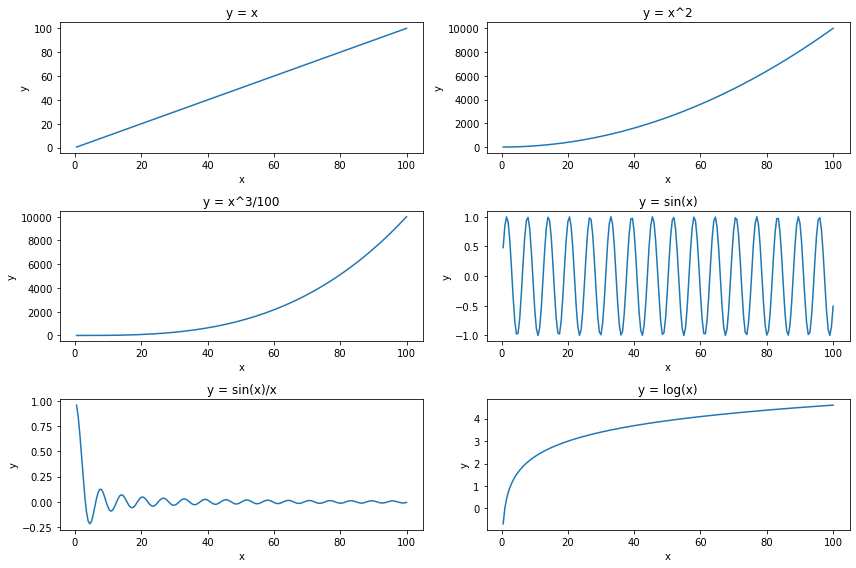

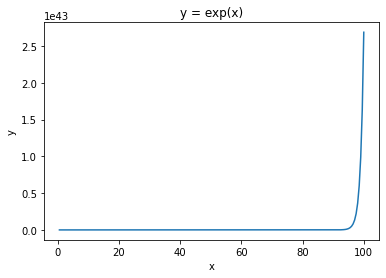

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

y = x
axs[0, 0].plot(x, y)
axs[0, 0].set_title('y = x')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')

y = x**2
axs[0, 1].plot(x, y)
axs[0, 1].set_title('y = x^2')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')

y = x**3/100
axs[1, 0].plot(x, y)
axs[1, 0].set_title('y = x^3/100')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')

y = np.sin(x)
axs[1, 1].plot(x, y)
axs[1, 1].set_title('y = sin(x)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')

y = np.sin(x)/x
axs[2, 0].plot(x, y)
axs[2, 0].set_title('y = sin(x)/x')
axs[2, 0].set_xlabel('x')
axs[2, 0].set_ylabel('y')

y = np.log(x)
axs[2, 1].plot(x, y)
axs[2, 1].set_title('y = log(x)')
axs[2, 1].set_xlabel('x')
axs[2, 1].set_ylabel('y')

plt.tight_layout()

plt.figure()
plt.plot(x, np.exp(x))
plt.title('y = exp(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.show()
#inspired code from [W3Schools. (n.d.). Matplotlib tutorial. W3Schools. https://www.w3schools.com/python/matplotlib_intro.asp]

In [13]:
#Question 10: Find standard deviations of columns and lowest mean of rows of uniformly generated random numbers btw 1,2.

import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
#print(matrix)

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])
#print(df)

std_devs = df.std()
#print("Standard deviations of columns:\n", std_devs)
#print(df['a'].std())

for key,value in std_devs.items():
    if value== max(std_devs):
        print("For column:",key)
print("Maximum standard deviation is",max(std_devs))

means = df.mean(axis=1)   #axis = 1 means in rowly fashion
for key, value in means.items():
    if value==min(means):
        print("\nRow:", key)
print("Has the lowest mean. That is:", min(means))

For column: c
Maximum standard deviation is 0.35085831570934006

Row: 4
Has the lowest mean. That is: 1.2559530056272992


In [14]:
#Question 11: Extension of question 10.
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

#print(df)

no_of_LT8 = (df['g'] == 'LT8').sum()  #if they are same, that is counted and sum is taken.
print("Number of rows where g is 'LT8':", no_of_LT8)

df_lt8 = df[df['g'] == 'LT8']   #in whole df, wherever df['g']==LT8, we filterout them.

std_f_lt8 = df_lt8['f'].std()

print("Standard deviation of f for rows where g is 'LT8':", std_f_lt8)

no_of_GT8 = (df['g'] == 'GT8').sum()  #if they are same, that is counted and sum is taken.
print("\nNumber of rows where g is 'GT8':", no_of_GT8)

df_gt8 = df[df['g'] == 'GT8']   #in whole df, wherever df['g']==GT8, we filterout them.

std_f_gt8 = df_gt8['f'].std()

print("Standard deviation of f for rows where g is 'GT8':", std_f_gt8)

#Inspired from [The pandas development team. (2024). pandas documentation (Version 2.2.2). pandas. https://pandas.pydata.org/docs/]

Number of rows where g is 'LT8': 12
Standard deviation of f for rows where g is 'LT8': 0.4913234958199872

Number of rows where g is 'GT8': 8
Standard deviation of f for rows where g is 'GT8': 0.26289705439813144


In [15]:
#Question 12: Write a small piece of code to explain broadcasting in numpy.

#Broadcasting means an automatic repition of either value or matrix, thing that numpy does in background that matches the shape of needful. Like scalar transforming into
#an array just to get multiplied. Example:

import numpy as np
A = np.array([1,2,3])
B = 2  #is a scalar, but,
print(A*B) 
# is an array. Here, 2 converted to np array of [2,2,2], such that the multiplication happens.

print("\n")

#Another case, when a array shapes itself such that broadcasting helps to add. For example:

A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([1, 2, 3])
print(A+B)  #Here, [1,2,3] became [[1,2,3],[1,2,3]]. 


[2 4 6]


[[2 4 6]
 [5 7 9]]


In [18]:
#Question 13: argmin of numpy and normal numpy
import numpy as np
#Let 
A = np.array([3, 1, 4, 1, 5, 9])

min_index = 0
for i in range(1, len(A)):
    if A[i] < A[min_index]:
        min_index = i
print("Index of minimum element:", min_index)


#Using numpy's argmin:
np_result = np.argmin(A)
print("Index of minimum element (np.argmin):", np_result)


Index of minimum element: 1
Index of minimum element (np.argmin): 1
